In [645]:
#Samantha Brayton
#March 2023
#Project 2 Data Analysis

In [646]:
import pandas as pd

In [647]:
import matplotlib.pyplot as plt

In [648]:
#import the original .csv file
df1 = "/Users/sambrayton/Desktop/DataSciProg/Project1/Fall_Comp.csv"

In [649]:
#import the clean .csv file
dfc = "/Users/sambrayton/Desktop/DataSciProg/Project2/cleaned_survey.csv"

In [650]:
df = pd.read_csv(dfc)
df = df.drop(columns=['Unnamed: 0'])

In [651]:
df.head()
deg=  df.groupby(['degree'])['degree'].count()
#deg = deg.rename(columns={'degree':'Degree','':'Count'})
#deg.columns

In [652]:
demo = df[['course','degree','gender','race','age']]
demo

,course,degree,gender,race,age
0,CMP 128 Computer Science I,Computer Science,Man,White/Caucasian,19-20
1,NaN,Computer Science,Man,White/Caucasian,25-34
2,CMP 128 Computer Science I,Liberal Arts,Woman,White/Caucasian,19-20
3,CMP 128 Computer Science I,Computer Science,Man,Asian,18 and younger
4,CMP 128 Computer Science I,Information Technology,Man,White/Caucasian,25-34
...,...,...,...,...,...
213,CMP 131 Fundamentals of Programming (Python),Information Technology,Man,Multi-Racial,21-24
214,CMP 128 Computer Science I,Computer Science,Man,Asian,19-20
215,CMP 128 Computer Science I,"Technical Studies, Applied Associate of Science",Man,White/Caucasian,25-34
216,CMP 128 Computer Science I,Computer Science,Man,Multi-Racial,21-24


In [653]:
#1. How many students from each different class responded to the survey? 
course = demo.groupby(['course']).count().reset_index()
course = course.drop(columns={'gender','race','age'}).rename(columns={'degree':'count'})
course


,course,count
0,CMP 128 Computer Science I,150
1,CMP 130 Intro to IT,9
2,CMP 131 Fundamentals of Programming (Python),34
3,CMP 239 Internet & Web Page Design,24


In [654]:
#2. What are the gender distribution?
gender = demo.groupby(['gender']).count().reset_index()
gender = gender.drop(columns={'course','race','age'}).rename(columns={'degree':'count'})
gender

,gender,count
0,I do not identify,3
1,Man,163
2,Non-binary,3
3,Prefer not to say,7
4,Woman,42


In [655]:
#3. What is the racial/ethnic diversity?
#race= demo.groupby('race').count().reset_index()
ethnicity = demo.groupby(['race']).count().reset_index().rename(columns={'race':'ethnicity'})
ethnicity = ethnicity.drop(columns={'gender','course','age'}).rename(columns={'degree':'count'})
ethnicity

,ethnicity,count
0,American Indian/Native American/Alaska Native,1
1,Asian,32
2,Black/African American,4
3,Choose not to reply,12
4,Hispanic or Latino,44
5,Multi-Racial,33
6,White/Caucasian,92


In [656]:
#4. What is the age distribution for the survey?
age = demo.groupby(['age']).count().reset_index()
age = age.drop(columns={'gender','race','course'}).rename(columns={'degree':'count'})
age

,age,count
0,18 and younger,78
1,19-20,70
2,21-24,42
3,25-34,15
4,35-64,10
5,65+,3


In [657]:
#What events of the Department of IT had the most and least participants?
events = df.drop(columns=['course','degree','gender', 'race', 'age'])
attendance = (events == 'Yes').sum()
most = attendance.sort_values(ascending=[False]).head(5).reset_index().rename(columns={'index':'event',0:'count'})
most

,event,count
0,individual_campus_visit,69
1,oncampus_info_session,63
2,open_house,52
3,hs_info_session.1,47
4,virtual_info_session,29


In [658]:
least = attendance.sort_values().head(5).reset_index().rename(columns={'index':'event',0:'count'})
least


,event,count
0,corporate_training,1
1,women_who_dare,2
2,ccm_summer_camp,4
3,workforce_development_class,5
4,hour_of_code,6


In [659]:
#What is the gender ratio among the different courses?
gender_ratio = demo.groupby(['course','gender']).course.count()
gender_ratio

course                                        gender           
CMP 128 Computer Science I                    I do not identify      3
                                              Man                  114
                                              Non-binary             1
                                              Prefer not to say      6
                                              Woman                 26
CMP 130 Intro to IT                           Man                    8
                                              Woman                  1
CMP 131 Fundamentals of Programming (Python)  Man                   24
                                              Non-binary             2
                                              Woman                  8
CMP 239 Internet & Web Page Design            Man                   16
                                              Prefer not to say      1
                                              Woman                  7
Name: course,

In [660]:
#Females under the age of 25

population = demo[((demo.age == '18 and younger') | (demo.age == '19-20') | (demo.age == '21-24'))&(demo.gender == 'Woman')]
population = population.drop(columns=['gender'])
population.head()

,course,degree,race,age
2,CMP 128 Computer Science I,Liberal Arts,White/Caucasian,19-20
11,CMP 128 Computer Science I,Business,Multi-Racial,18 and younger
33,CMP 128 Computer Science I,Computer Science,Hispanic or Latino,18 and younger
34,CMP 128 Computer Science I,Computer Science,Asian,18 and younger
37,CMP 128 Computer Science I,Challenger Program,American Indian/Native American/Alaska Native,19-20


In [661]:
#Population enrolled in IT related degree program
it_related = population[(population.degree == 'Computer Science')|(population.degree == 'Data Analytics Certificate of Achievement')|(population.degree == 'Information Security Certificate of Achievement')|(population.degree == 'Information Technology')|(population.degree == 'Web Development Certificate of Achievement')]
it_related = it_related.groupby(['race']).count().reset_index().drop(columns=['course','degree']).rename(columns={'age':'count','race':'ethnicity'})
it_related

,ethnicity,count
0,Asian,6
1,Hispanic or Latino,5
2,Multi-Racial,6
3,White/Caucasian,2


In [662]:
#Population degree programs 
pop_deg = population.groupby(['degree']).count().reset_index().drop(columns=['course','race']).rename(columns={'age':'count'})
pop_deg

,degree,count
0,Biology,1
1,Business,3
2,CIS Game Development Option,3
3,Challenger Program,2
4,Computer Science,12
5,Data Analytics Certificate of Achievement,1
6,Digital Media Technology,1
7,Early Childhood Education,1
8,Engineering,3
9,Information Technology,5


Text(0.5, 1.0, 'How many students from each different class responded to the survey?')

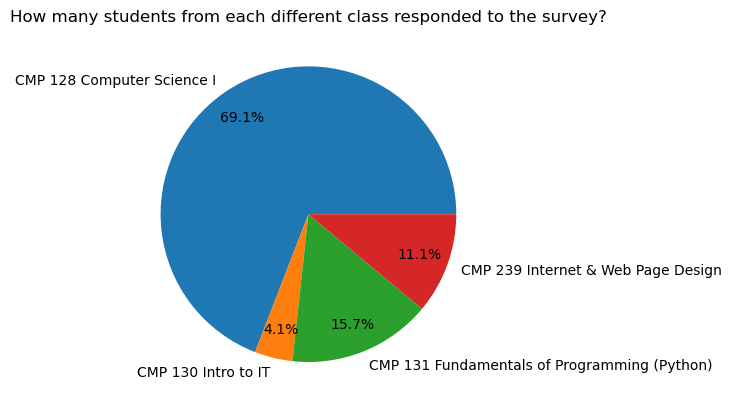

In [663]:
import matplotlib.pyplot as plt

plt.pie(course['count'], autopct='%1.1f%%',labels=course.course,pctdistance=.8)
plt.title("How many students from each different class responded to the survey?")
#plt.legend(title="Course",labels=course.course,loc=10)


Text(0.5, 1.0, 'Gender distribution')

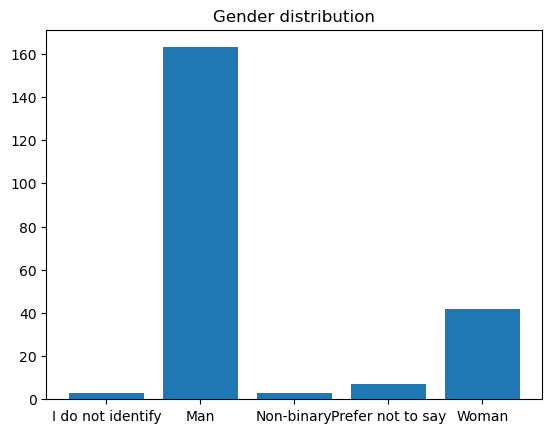

In [664]:
plt.bar(gender.gender,gender['count'])
plt.title("Gender distribution")


Text(0.5, 1.0, 'Gender percentages')

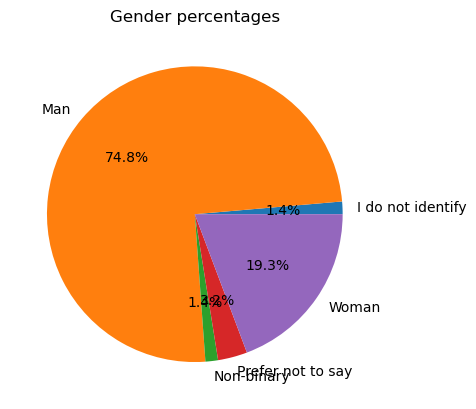

In [665]:

plt.pie(gender['count'], autopct='%1.1f%%',labels=gender.gender)#pctdistance=1.2,labeldistance=1.4)
plt.title("Gender percentages")

Text(0.5, 1.0, 'Racial/ethnic diversity')

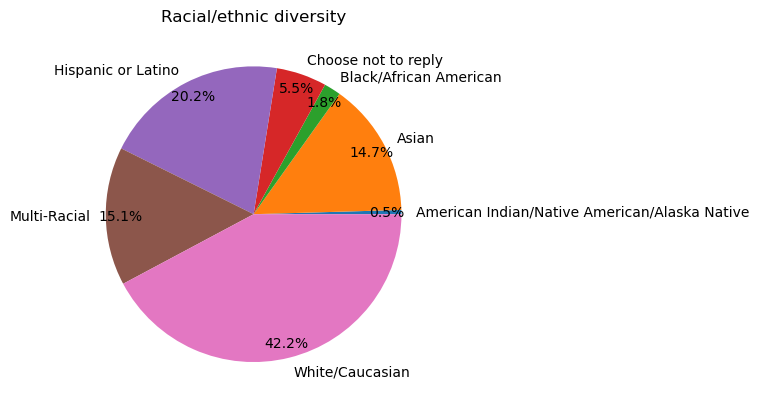

In [666]:
plt.pie(ethnicity['count'], autopct='%1.1f%%',labels=ethnicity.ethnicity,pctdistance=.9)
plt.title("Racial/ethnic diversity")

Text(0.5, 1.0, 'Age distribution')

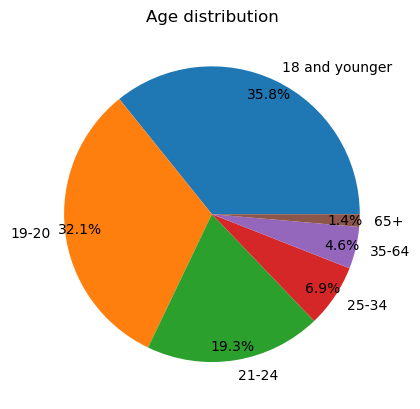

In [667]:
plt.pie(age['count'], autopct='%1.1f%%',labels=age.age,pctdistance=.9)
plt.title("Age distribution")

Text(0.5, 1.0, 'Events with the highest attendance.')

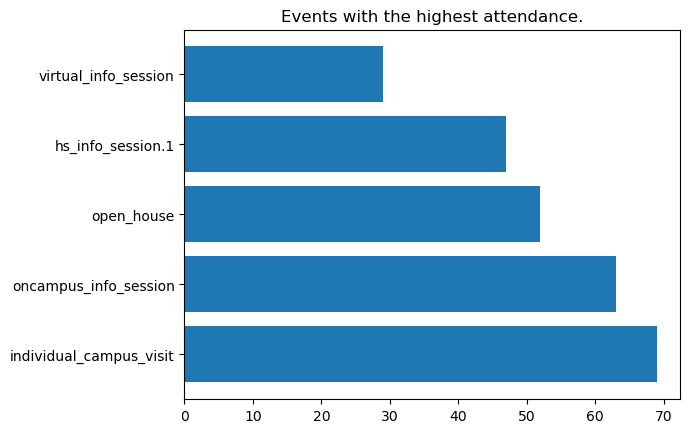

In [668]:
plt.barh(most.event,most['count'])
plt.title("Events with the highest attendance.")

Text(0.5, 1.0, 'Events with the lowest attendance.')

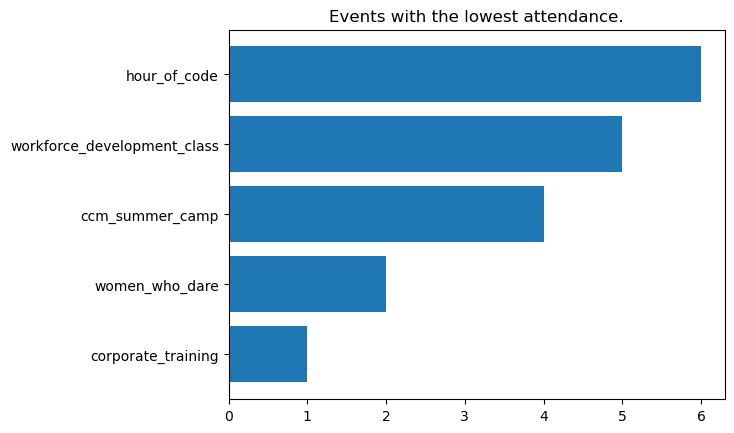

In [669]:
plt.barh(least.event,least['count'])
plt.title("Events with the lowest attendance.")

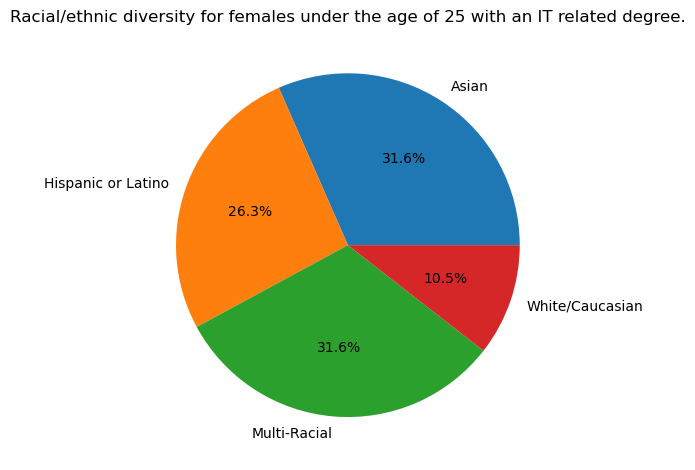

In [670]:
plt.pie(it_related['count'],labels=it_related.ethnicity,autopct='%1.1f%%')
plt.title("Racial/ethnic diversity for females under the age of 25 with an IT related degree.")
plt.tight_layout()